In [5]:
import os, sys
import pickle
import numpy as np
import scipy as sp
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")
from draw import draw_dolan_more, col

In [6]:
experiments_result_pd = pd.DataFrame.from_csv('../data/all_holydays.csv')

In [7]:
experiments_result_pd

,OCCAM-LogLoss-kmedians,OCCAM-NMF,OCCAM-NMF-l1,OCCAM-SVD-kmedians,SAAC-LogLoss,SAAC-NMF,SAAC-SVD,OCCAM-LogLoss,OCCAM-LogLoss-l1,OCCAM-LogLoss-l1-real-k,OCCAM-LogLoss-real-k,OCCAM-SVD,OCCAM-SVD-l1,OCCAM-SVD-l1-real-k,OCCAM-SVD-real-k,COPRA,NMF,walktrap
facebook0,2.729620e-01,2.360970e-01,1.076920e-01,8.801850e-02,4.120800e-01,3.699870e-01,3.809000e-01,3.324800e-01,3.411220e-01,3.324020e-01,3.294350e-01,2.735030e-01,1.043060e-01,1.020430e-01,3.113170e-01,1.651260e-01,3.078270e-01,2.380900e-01
facebook1,4.241860e-01,4.107150e-01,3.838500e-01,2.431000e-01,3.482370e-01,5.470370e-01,5.413110e-01,3.785140e-01,3.604220e-01,3.604220e-01,3.785140e-01,4.029970e-01,1.735090e-01,1.735090e-01,4.029970e-01,5.875990e-02,3.693520e-01,6.566630e-02
facebook2,4.974320e-01,4.176650e-01,4.128080e-01,2.642170e-02,4.874630e-01,4.790960e-01,4.719390e-01,4.061380e-01,4.740240e-01,1.925640e-01,4.449070e-01,3.122110e-01,2.776670e-01,2.281460e-01,3.997630e-01,5.210100e-02,4.602580e-01,6.856240e-02
facebook3,6.764520e-02,4.371060e-02,9.137390e-02,6.764520e-02,4.276680e-01,4.357600e-01,4.289740e-01,2.720590e-01,3.612900e-01,1.062020e-01,1.797550e-01,5.647900e-02,3.758450e-02,5.514760e-02,2.634740e-02,5.333040e-02,4.397370e-01,5.655460e-02
facebook4,2.835230e-01,2.148290e-01,1.451290e-01,2.835230e-01,5.925750e-01,6.090660e-01,6.099980e-01,3.689750e-01,2.997030e-01,5.216610e-01,6.006710e-01,3.413900e-01,8.742520e-02,4.229450e-01,5.300550e-01,2.970220e-01,5.536000e-01,2.827040e-01
facebook5,3.723120e-01,2.408220e-01,7.664790e-02,2.204720e-01,3.517420e-01,3.067380e-01,3.691320e-01,2.982850e-01,1.326250e-01,1.326250e-01,2.982850e-01,2.342450e-01,1.030170e-01,1.030170e-01,2.342450e-01,3.732250e-02,2.913390e-01,1.127870e-01
facebook6,5.289130e-01,4.708110e-01,1.328990e-01,3.641740e-01,5.867550e-01,5.662370e-01,6.117440e-01,5.458500e-01,3.163180e-01,5.545980e-01,5.827850e-01,4.394320e-01,2.605950e-01,3.111440e-01,5.447740e-01,1.456590e-01,4.997900e-01,4.145150e-01
facebook7,1.647070e-01,4.859420e-01,4.653890e-01,3.859140e-01,4.532180e-01,5.421120e-01,5.121010e-01,5.110330e-01,5.264760e-01,5.264760e-01,5.110330e-01,4.736300e-01,3.949510e-01,3.949510e-01,4.736300e-01,1.069530e-01,5.429570e-01,1.160220e-01
facebook8,2.510070e-01,2.104780e-01,2.176680e-01,2.176680e-01,2.286160e-01,2.728930e-01,2.676520e-01,2.151820e-01,2.250980e-01,2.250980e-01,2.151820e-01,1.340010e-01,5.086730e-02,5.086730e-02,1.340010e-01,5.666860e-02,1.846300e-01,1.678590e-01
facebook9,5.097120e-02,7.270020e-01,5.097120e-02,5.097120e-02,7.713470e-01,8.125310e-01,7.363600e-01,6.783960e-01,5.022870e-01,3.445440e-01,5.909120e-01,4.938110e-01,4.632880e-01,4.994280e-01,6.266880e-01,2.619670e-01,6.974540e-01,2.637120e-01


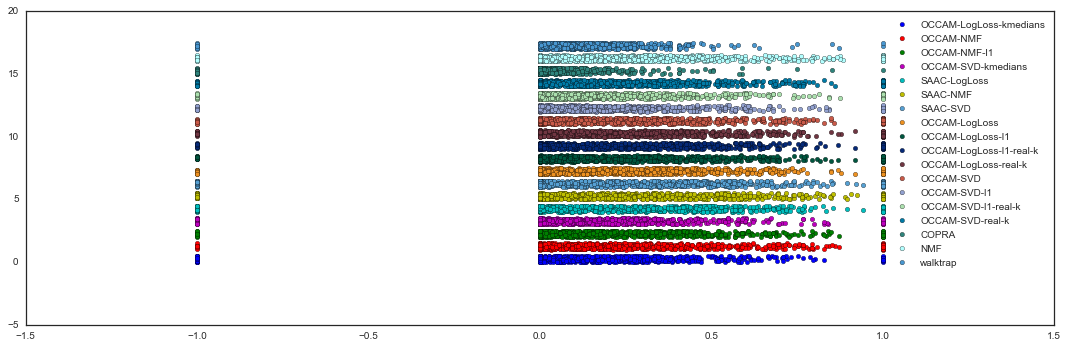

In [8]:
plt.figure(figsize=(15,5))
for i, col_name in enumerate(experiments_result_pd.columns):
    plt.scatter(experiments_result_pd[col_name], i+0.5*np.random.rand(experiments_result_pd.shape[0], 1),  c=col[i])
plt.legend(experiments_result_pd.columns)
plt.tight_layout()
#plt.xlim([-1.05, 1.05])

In [9]:
experiments_result_pd = 2 - experiments_result_pd

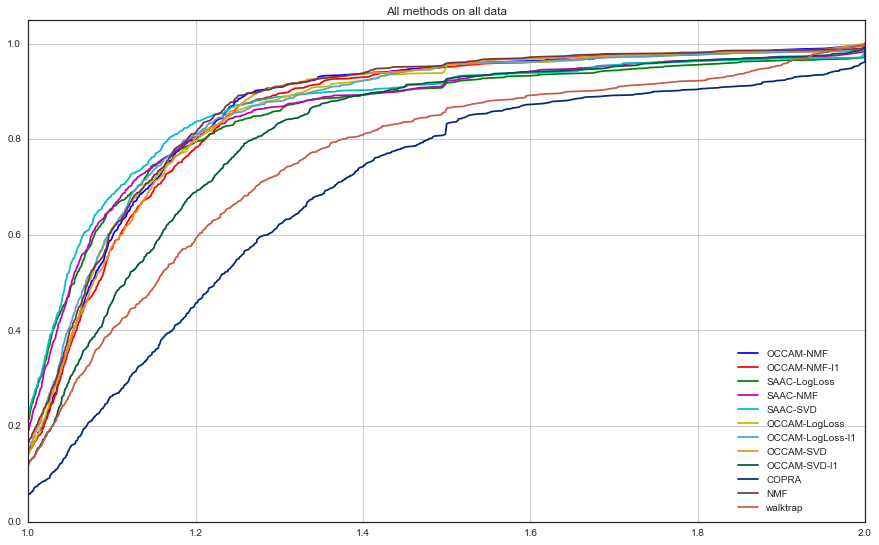

In [10]:
disp_all = [x for x in experiments_result_pd.columns if '-real' not in x and 'medians' not in x]
draw_dolan_more(experiments_result_pd, disp_all, 'All methods on all data')

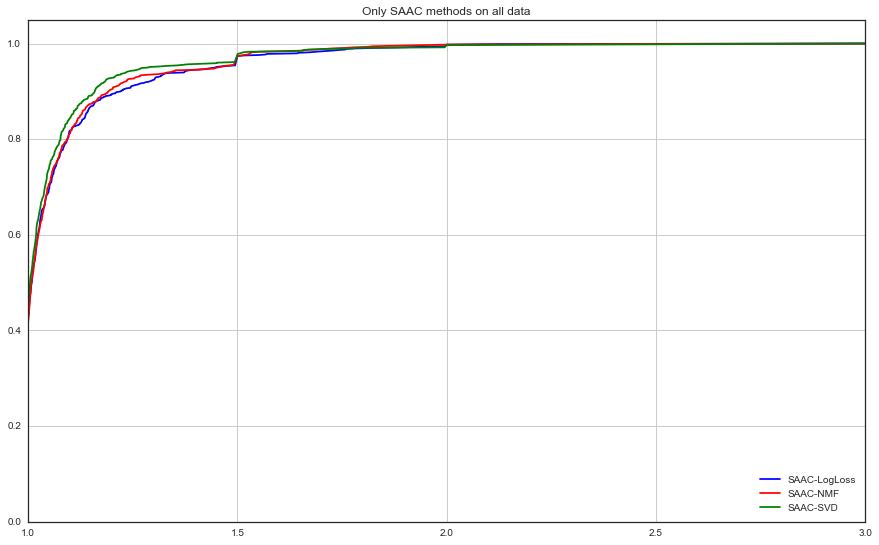

In [11]:
disp_SAAC = [x for x in disp_all if 'SAAC' in x]
draw_dolan_more(experiments_result_pd, disp_SAAC, 'Only SAAC methods on all data')

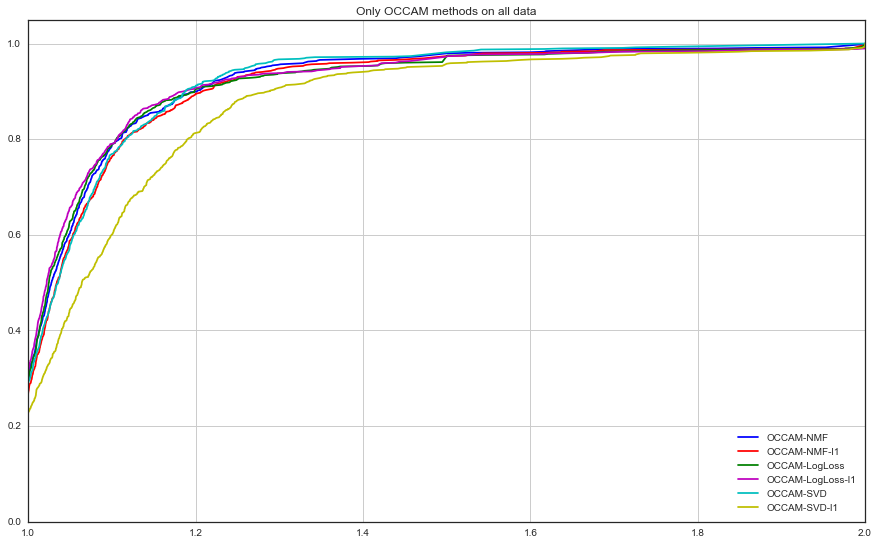

In [12]:
disp_OCCAM = [x for x in disp_all if 'OCCAM' in x]
draw_dolan_more(experiments_result_pd, disp_OCCAM, 'Only OCCAM methods on all data')

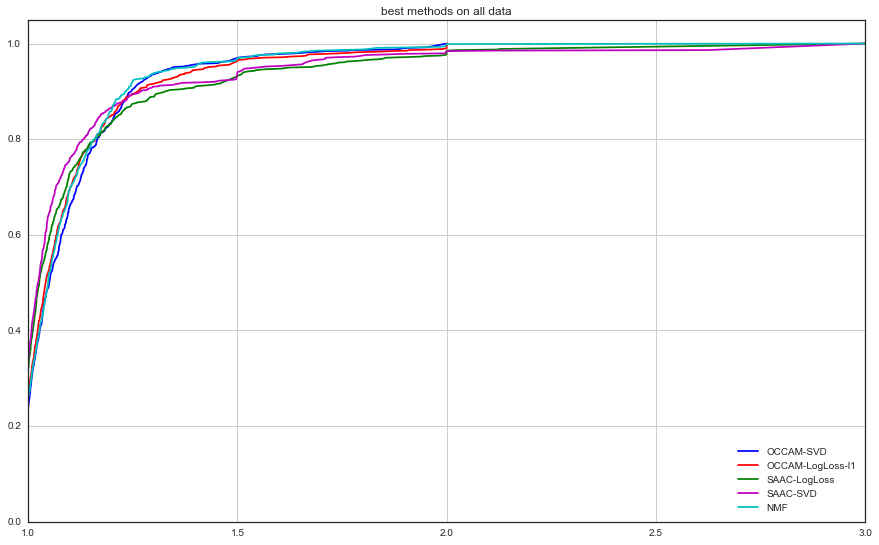

In [13]:
best_methods = ['OCCAM-SVD', 'OCCAM-LogLoss-l1', 'SAAC-LogLoss', 'SAAC-SVD', 'NMF']
draw_dolan_more(experiments_result_pd, best_methods, 'best methods on all data')

In [14]:
good_data_indx = experiments_result_pd.min(axis=1) < 1.3
print np.count_nonzero(good_data_indx)
good_data = experiments_result_pd.loc[good_data_indx,:]

160


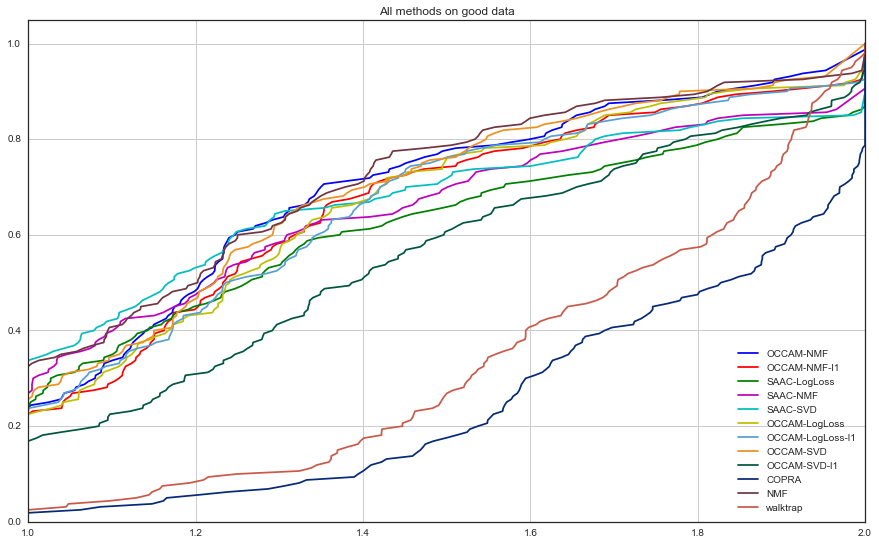

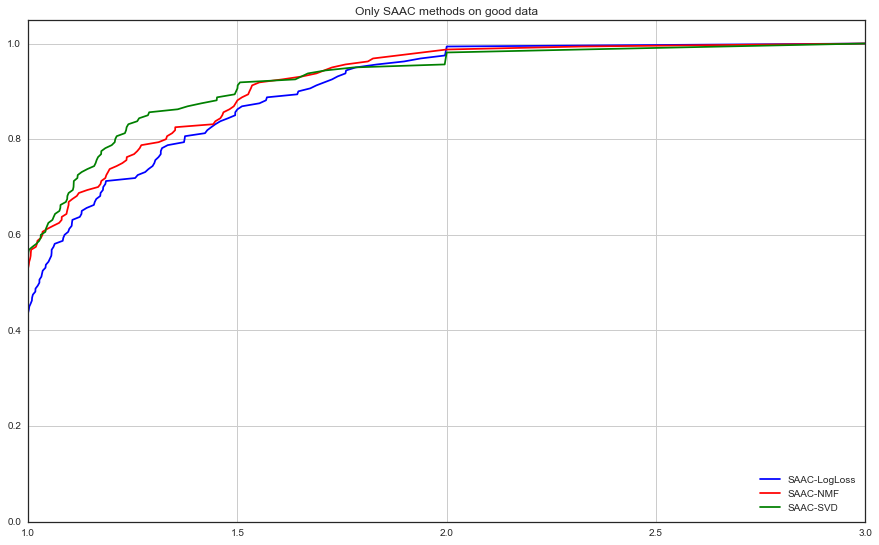

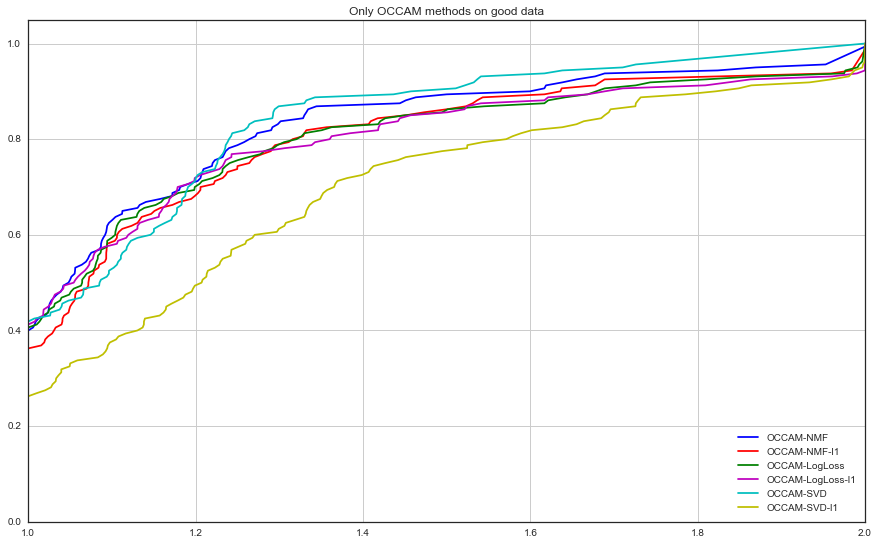

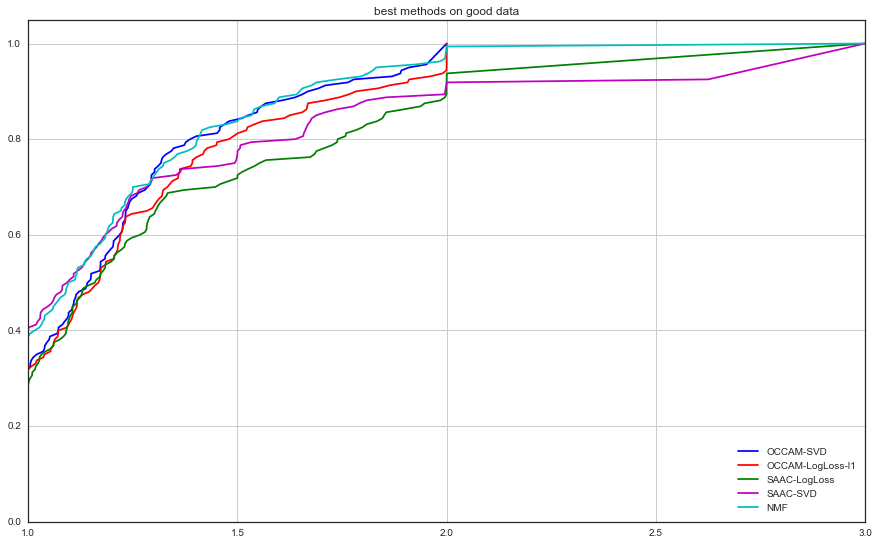

In [15]:
draw_dolan_more(good_data, disp_all, 'All methods on good data')
draw_dolan_more(good_data, disp_SAAC, 'Only SAAC methods on good data')
draw_dolan_more(good_data, disp_OCCAM, 'Only OCCAM methods on good data')
draw_dolan_more(good_data, best_methods, 'best methods on good data')

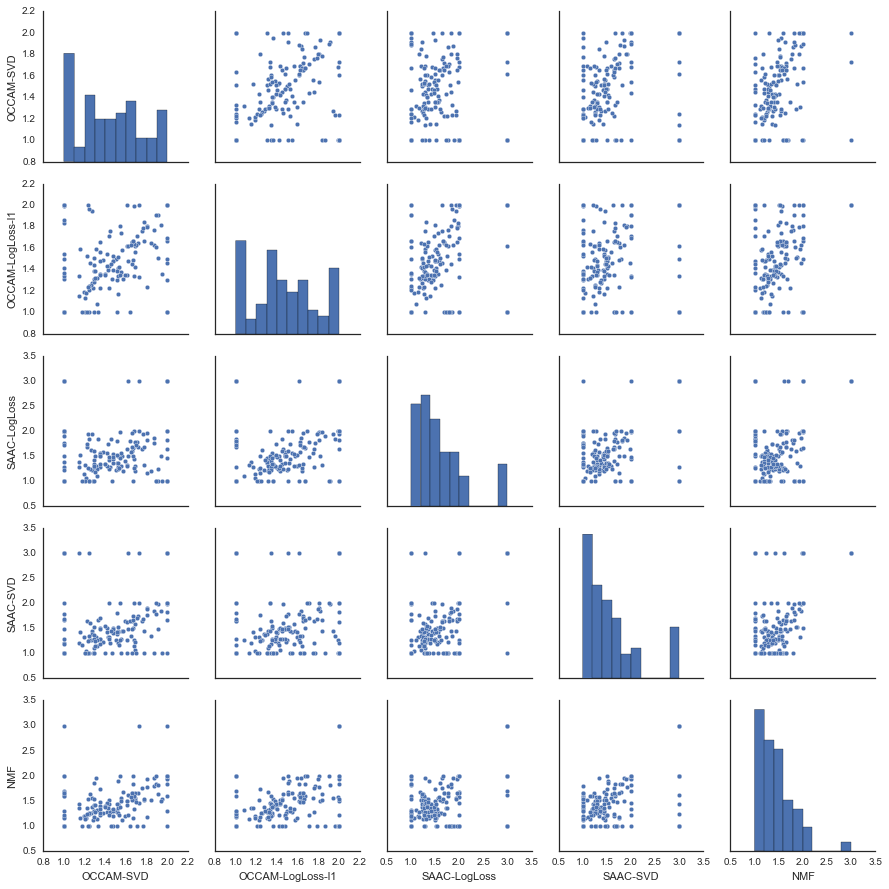

In [16]:
sns.pairplot(good_data[best_methods])